# Random Forest Model + Explainable AI Techniques (XAI)

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Train Dataset

In [2]:
df_train = pd.read_csv("../../0_Datasets/Farm-Flow/train.csv")

In [3]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


Load Test Dataset

In [4]:
df_test = pd.read_csv("../../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.672105,-0.457813,-0.577140,-0.443123,-0.276940,-0.267571,-0.272742,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,-0.277181,-0.267813,-0.272983,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
2,-0.454205,-0.457813,-0.577140,-0.443123,-0.276909,-0.268058,-0.272969,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276907,-0.267537,-0.272708,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.454205,-0.253238,-0.004560,-0.443123,-0.276892,-0.267522,-0.272693,0.728588,-0.241889,1.129475,...,-0.477522,-0.635539,-0.408378,-0.455263,-0.329944,-0.199849,-0.596727,-0.418623,HTTP_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,1.942696,2.201655,2.285759,2.444445,-0.277003,-0.267561,-0.272768,0.891878,1.727690,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.691239,0.897993,0.262007,1.154806,Arp_Spoofing,1
15779,2.160596,2.201655,2.285759,2.444445,-0.276991,-0.267622,-0.272793,0.728588,1.928668,-0.147053,...,-0.240860,1.678331,-0.072901,-0.267431,2.393212,2.434972,1.265201,2.728235,Normal,0
15780,-0.236304,-0.662387,-0.577140,-0.443123,-0.277906,-0.268577,-0.273730,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
15781,-0.454205,-0.662387,-0.577140,-0.443123,-0.277687,-0.268577,-0.273620,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1


-----
## Train and Test Datasets

Drop Multiclass Column

In [6]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [7]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [8]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [9]:
y = df_train["is_attack"].values

Split into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Load Previous Trained Model

In [11]:
# Load the saved Random Forest model
model_folder = "../../2_Modeling_Phase/Saved-Models/"
model_filename = "Farm-Flow_RF_Random_Forest_Model.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred)
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---
## LOFO (Leave One Feature Out)

### How it works
LOFO (Leave One Feature Out) Importance calculates the importances of a set of features based on a metric of choice, for a model of choice, by iteratively removing each feature from the set, and evaluating the performance of the model, with a validation scheme of choice, based on the chosen metric.

LOFO first evaluates the performance of the model with all the input features included, then iteratively removes one feature at a time, retrains the model, and evaluates its performance on a validation set. The mean and standard deviation (across the folds) of the importance of each feature is then reported.

If a model is not passed as an argument to LOFO Importance, it will run LightGBM as a default model.

### How it applys
Understand the feature importance of the dataset

### Repository:
- https://github.com/aerdem4/lofo-importance

In [18]:
#pip install lofo-importance

In [19]:
combined_data = np.column_stack((X, y))

features_names = [f"{feature_names[i]}" for i in range(X_train_labeled.shape[1])]
target_name = "is_attack"

column_names = features_names + [target_name]

combined_df = pd.DataFrame(combined_data, columns=column_names)

combined_df

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.022646,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,1.0
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.022646,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,1.0
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.022646,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,1.0
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.022646,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,0.0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.022646,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.022646,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,1.0
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.022646,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,1.0
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.022646,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,0.0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.022646,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,0.0


In [20]:
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold

C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

  0%|          | 0/33 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Info] Number of positive: 238, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670423 -> initscore=0.710097
[LightGBM] [Info] Start training from score 0.710097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667606 -> initscore=0.697376
[LightGBM] [Info] Start training from score 0.697376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 236, number of negative: 119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664789 -> initscore=0.684708
[LightGBM] [Info] Start training from score 0.684708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667606 -> initscore=0.697376
[LightGBM] [Info] Start training from score 0.697376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669492 -> initscore=0.705886
[LightGBM] [Info] Start training from score 0.705886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667606 -> initscore=0.697376
[LightGBM] [Info] Start training from score 0.697376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667606 -> initscore=0.697376
[LightGBM] [Info] Start training from score 0.697376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 237, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667606 -> initscore=0.697376
[LightGBM] [Info] Start training from score 0.697376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 237, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667606 -> initscore=0.697376
[LightGBM] [Info] Start training from score 0.697376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

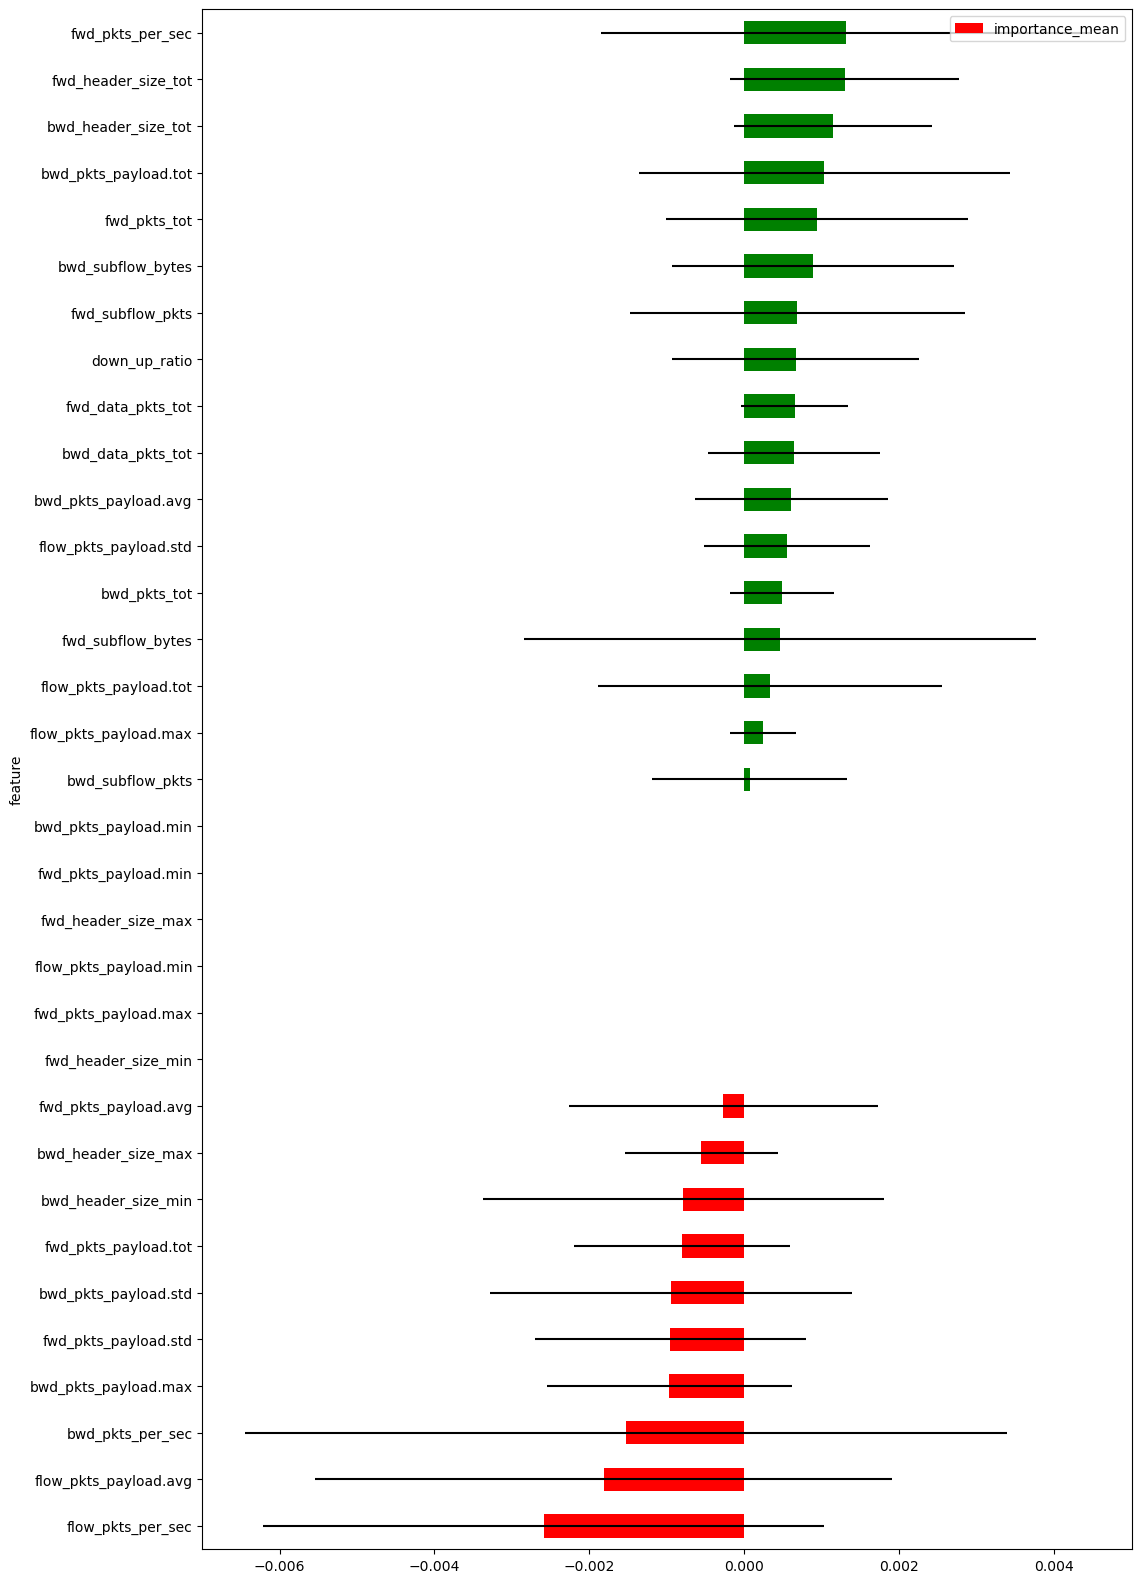

In [21]:
# extract a sample of the data
sample_df = combined_df.sample(frac=0.01, random_state=0)

# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

# define the binary target and the features
dataset = Dataset(df=sample_df, target="is_attack", features=[col for col in combined_df.columns if col != "is_attack"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))